In [1]:
import os, sys, glob, pylab as pl, h5py
from importlib import reload
sys.path.append('./pysrc_new/')
sys.path.append('./forCHIMES/')
import numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import parameters as param
import RPC_Hydro as proj, emission
import plots

In [2]:
# fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances_%s0s.hdf5'%sim_prefix
fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances.hdf5'
fn_cloudy_solution = proj.rpc_hydro_dir+'forCHIMES/cloudy_RPC_solution.npz'
fn_static_solution = proj.rpc_hydro_dir+'forCHIMES/static_solution.npz'
fn_static_solutions = dict([(logU_f,fn_static_solution[:-4]+'%d.npz'%logU_f) for logU_f in np.arange(-4,3)])
f_abundances = h5py.File(fn_abundances)

In [3]:
sim_resolution = '1024'
sim_prefix = '42'
sim_suffix = 'D'

In [4]:
lums = np.array([2.5]*7+[7.5]*3) * 10.**np.array([12,9,10,11,13,8,14,12,11,10])*un.Lsun.to('erg/s')
names = ['B2D_N%s_R100_%s%d%s'%(sim_resolution,sim_prefix,i,sim_suffix) for i in range(len(lums))]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(lums))]

In [5]:
sim_data_names = np.array(sim_data_names)[lums.argsort()].tolist()
names = np.array(names)[lums.argsort()].tolist()

In [6]:
lums = np.sort(lums)

In [7]:
nSnapshots = [None]*len(lums)
for i in range(len(lums)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])

In [8]:
sim_data_names

['/home/jonathan/simulations/B2D_N1024_R100_425D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_421D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_422D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_429D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_423D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_428D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_420D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_427D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_424D/data/',
 '/home/jonathan/simulations/B2D_N1024_R100_426D/data/']

In [9]:
nSnapshots

[400, 400, 400, 400, 400, 44, 27, 80, None, None]

In [10]:
lums

array([9.570e+41, 9.570e+42, 9.570e+43, 2.871e+44, 9.570e+44, 2.871e+45,
       9.570e+45, 2.871e+46, 9.570e+46, 9.570e+47])

In [13]:
reload(proj)
qs = [proj.Run(names[i],nSnapshots[i],r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums))[:] 
      if os.path.exists(sim_data_names[i]) and i in (1,6)]
qRP = qs[1] #6
qGP = qs[0] #1

In [14]:
['%.1f'%log(q.LAGN) for q in qs]

['43.0', '46.0']

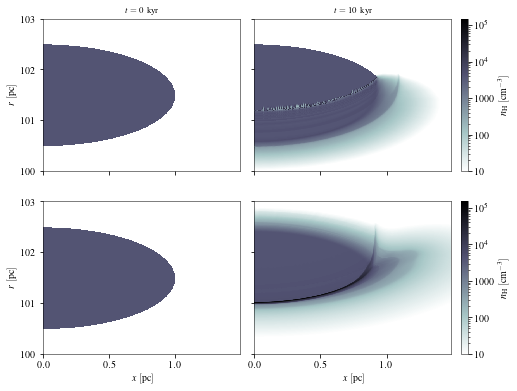

In [30]:
reload(plots)
iSnapshots = [0,10,20][:-1]
cb = plots.sim_evolution((qGP,qRP),iSnapshots,'nH',rng=(10,1.5e5),cmap=plots.density_cmap)    
pl.savefig(plots.figdir+'density_evolution.png',dpi=300,bbox_inches='tight')

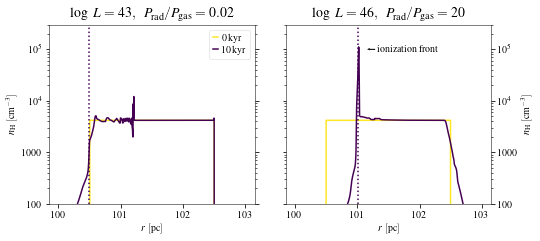

In [24]:
reload(plots)
# iSnapshots = [1,10,30,100]
plots.skewers(qs[:2],'r',('nH',),rngs=((100,3e5),(75,1e6)), iTs=iSnapshots,ix=10)
pl.savefig(plots.figdir+'skewers_vs_dr.pdf',bbox_inches='tight')

loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5


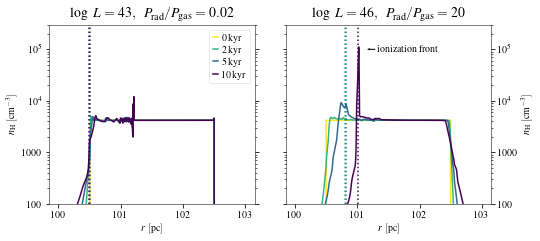

In [25]:
reload(plots)
iSnapshots = [0,2,5,10]
plots.skewers(qs[:3],'r',('nH',),rngs=((100,3e5),(75,1e6)), iTs=iSnapshots,ix=10)
# pl.savefig(plots.figdir+'skewers_vs_dr_L12_L13.pdf',bbox_inches='tight')

loading snapshot #8
loading snapshot #8
loading snapshot #8


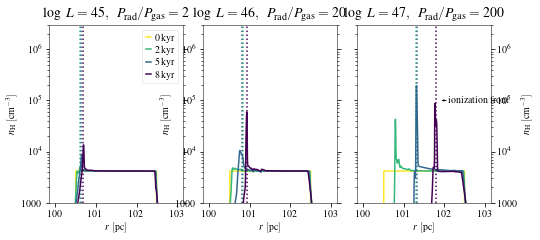

In [12]:
reload(plots)
iSnapshots = [0,2,5,8]
plots.skewers(qs[3:],'r',('nH',),rngs=((1e3,3e6),(75,1e6)), iTs=iSnapshots,ix=10)
pl.savefig(plots.figdir+'density_profiles_L11_L12_L13.pdf',bbox_inches='tight')

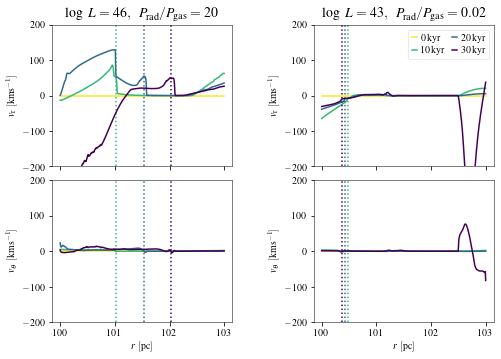

In [17]:
reload(plots)
# iSnapshots = [10,20,30,40]
plots.skewers(qs[:2],'r',('v_r','v_theta'),rngs=((-200,200),(-200,200)), iTs=iSnapshots,ix=10,logy=False)
pl.savefig(plots.figdir+'skewers_vr_vs_dr.pdf',bbox_inches='tight')

loading snapshot #20


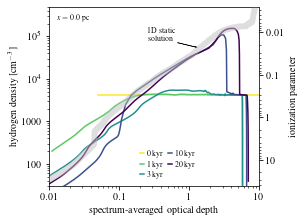

In [119]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time(
    qRP,iTs=(0,1,3,10,20,30)[:-1],var='nH',rng=(10,1.5e5),ix=10,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_time_%s.pdf'%qs[0].name,bbox_inches='tight')

(7000.0, 400000.0)

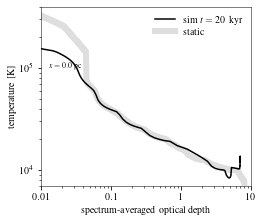

In [129]:
reload(plots)
plots.comparison_to_static_temperature_solution(
    qRP,iT=20,ix=10,
    static_solution_fn=fn_static_solution)
pl.xlim(0.01,10)
pl.ylim(7e3,4e5)

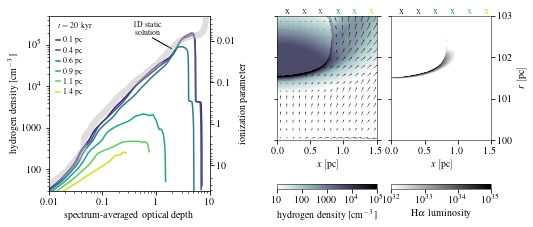

In [130]:
reload(plots)
plots.comparison_to_static_solution_by_x(
    qRP,iT=20,var='nH',
    rng=(10,1.5e5),
    ixs=np.array([75,250,425,600,775,950])//2,dx=10,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_x_%s.png'%qs[0].name,dpi=300,bbox_inches='tight')

### NeV and NeIII weighted density and temperature for static and dynamic solution


In [23]:
static_RP = np.load(fn_static_solutions[2])
static_GP = np.load(fn_static_solutions[-4])
static_RP_cloudy = np.load(fn_cloudy_solution)

/home/jonathan/rpc_hydro/./pysrc_new/plots.py:368: RuntimeWarning: invalid value encountered in double_scalars
  fHIs_static = np.concatenate([[static['NHIs'][0]/static['NHs'][0]], fHIs_static])
/home/jonathan/rpc_hydro/./pysrc_new/Table.py:17: RuntimeWarning: invalid value encountered in greater
  return arr + (arr>v)*(v-arr)
/home/jonathan/rpc_hydro/./pysrc_new/Table.py:15: RuntimeWarning: invalid value encountered in less
  return arr + (arr<v)*(v-arr)
/home/jonathan/rpc_hydro/./pysrc_new/emission.py:40: RuntimeWarning: divide by zero encountered in log
  LNeVa     = lambda T4, nNeV,   ne : 0.75 * 8.629e-8 * 0.232   * nNeV   * ne * T4**(-0.5+0.016+0.019*ln(T4))*np.e**(-E_NeVa  /(1e4*T4*cons.k_B.to('erg/K').value)) * E_NeVa
/home/jonathan/rpc_hydro/./pysrc_new/emission.py:40: RuntimeWarning: divide by zero encountered in true_divide
  LNeVa     = lambda T4, nNeV,   ne : 0.75 * 8.629e-8 * 0.232   * nNeV   * ne * T4**(-0.5+0.016+0.019*ln(T4))*np.e**(-E_NeVa  /(1e4*T4*cons.k_B.to('erg/K

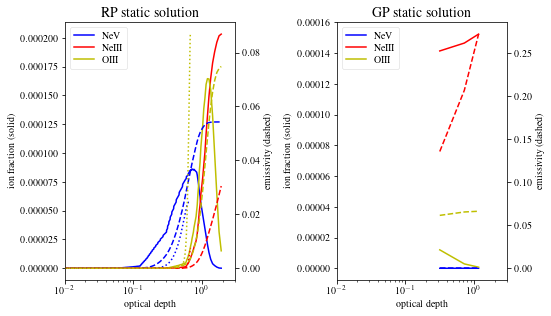

In [27]:
reload(plots)
f = pl.figure(); pl.subplots_adjust(wspace=0.6)
for i,(static,q,static_cloudy) in enumerate(((static_RP,qRP,static_RP_cloudy),(static_GP,qGP,None))):
    ax = pl.subplot(1,2,i+1)
    plots.ionFraction_and_emissivity_static(static,q,static_cloudy)
    pl.title('%s static solution'%(('RP','GP')[i]),fontsize=14)

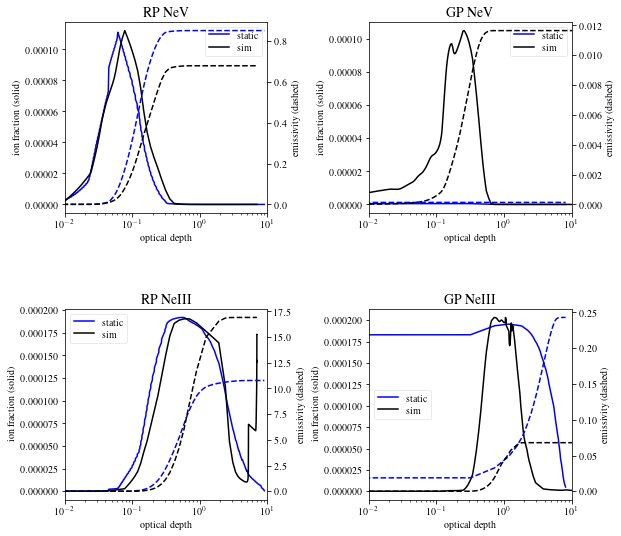

In [213]:
reload(plots)
f = pl.figure(figsize=(8,8)); pl.subplots_adjust(wspace=0.5,hspace=0.5)
for j,ion in enumerate(('NeV','NeIII')):
    for i,(static,q) in enumerate(((static_RP,qRP),(static_GP,qGP))):
        ax = pl.subplot(2,2,j*2+i+1)
        plots.ionFraction_and_emissivity(ion,static,q,iT=(20,200)[i],ix=10)
        pl.title('%s %s'%(('RP','GP')[i],ion),fontsize=14)

### GP NeV emission is much stronger in sim than in static solution, due to much lower densities in sim

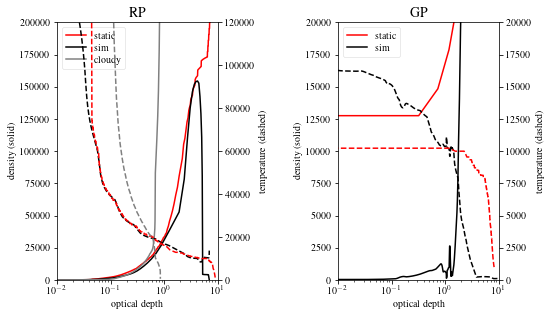

In [19]:
reload(plots)
f = pl.figure(); pl.subplots_adjust(wspace=0.75)
for i,(static,q,static_cloudy) in enumerate(((static_RP,qRP,static_RP_cloudy),(static_GP,qGP,None))):
    ax = pl.subplot(1,2,i+1)
    plots.density_and_temperature_vs_static(static,q,static_cloudy,iT=(20,200)[i],ix=10,yls0=((0,2e5),(0,2e4))[i])
    pl.title('%s'%(('RP','GP')[i]),fontsize=14)
    if i==1: pl.ylim(0,8e4)
    if i==1: pl.ylim(0,2e4)

(1e-06, 1)

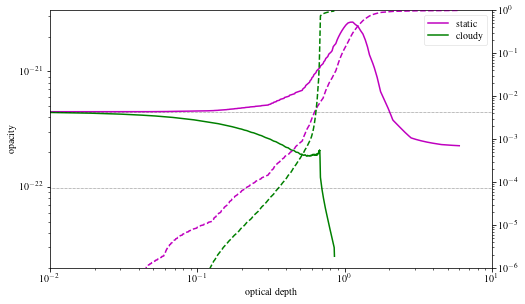

In [20]:
static_RP = np.load(fn_static_solution)
static_RP_cloudy = np.load(fn_cloudy_solution)
for i,f in enumerate((static_RP,static_RP_cloudy)):
    pl.loglog(f['taus'],f['sigmas'],c='mg'[i],label=('static','cloudy')[i])
pl.legend()
pl.xlabel('optical depth')
pl.ylabel('opacity')
pl.axhline(f['sigmas'][0],c='k',lw=0.5,ls=':')
pl.twinx()
for i,f in enumerate((static_RP,static_RP_cloudy)):                                                
    pl.loglog(f['taus'],f['fHIs'],c='mg'[i],label=('static','cloudy')[i],ls='--')
#     pl.loglog(f['taus'],f['NHIs']*10**-17.2,c='mg'[i],label=('static','cloudy')[i],ls='--')
#     pl.loglog(f['taus'],f['NHs']*4.5e-22,c='mg'[i],label=('static','cloudy')[i],ls=':')
pl.axhline(4.5e-22/10**-17.2,c='k',lw=0.5,ls=':')
pl.xlim(0.01,10)
pl.ylim(1e-6,1)

(0.01, 100000000.0)

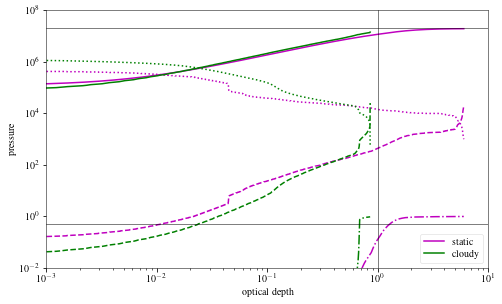

In [27]:
static_RP = np.load(fn_static_solution)
static_RP_cloudy = np.load(fn_cloudy_solution)
for i,f in enumerate((static_RP,static_RP_cloudy)):
    P = (2-f['fHIs'])*f['nHs']*f['Ts']
    pl.loglog(f['taus'],P,c='mg'[i],label=('static','cloudy')[i])
    pl.loglog(f['taus'],f['nHs'],c='mg'[i],ls='--')
    pl.loglog(f['taus'],f['Ts'],c='mg'[i],ls=':')
    pl.loglog(f['taus'],f['fHIs'],c='mg'[i],ls='-.')
Prad = (1e46*un.erg/un.s/(4*np.pi*(1000*un.pc)**2*cons.c*cons.k_B)).to('cm**-3*K')
pl.axhline(Prad.value,c='k',lw=0.5)
pl.axhline(0.5,c='k',lw=0.5)
pl.axvline(1,c='k',lw=0.5)
pl.legend()
pl.xlabel('optical depth')
pl.ylabel('pressure')
pl.xlim(1e-3,10)
pl.ylim(0.01,1e8)

loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5


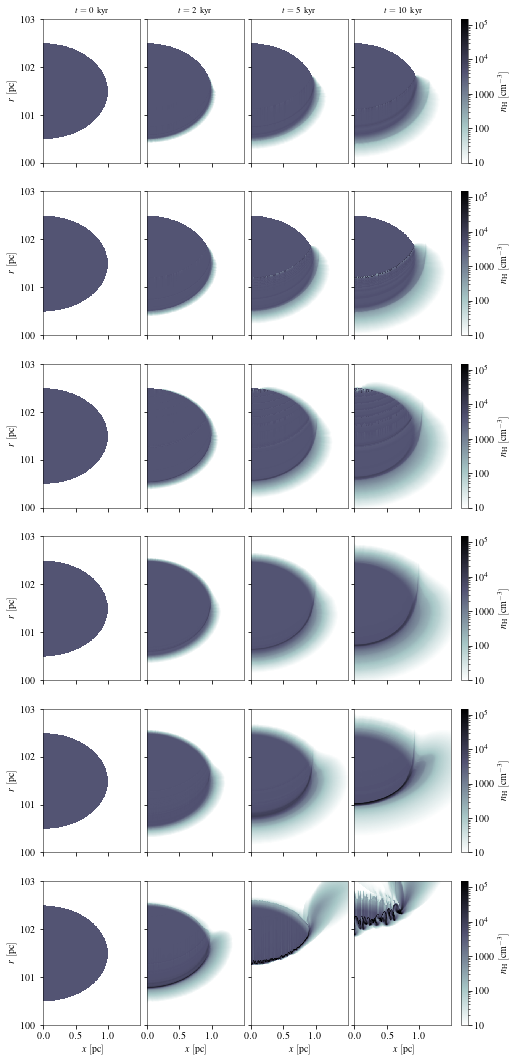

In [84]:
reload(plots)
iSnapshots = [0,2,5,10]
cb = plots.sim_evolution(sqs,iSnapshots,'nH',rng=(10,1.5e5),cmap=plots.density_cmap)    


(10, 1000000.0)

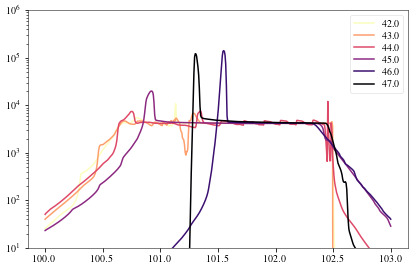

In [85]:
ix=10
for iq,run in enumerate(sqs):
    iT = (20,5)[iq==5]
    pl.plot(run[iT]['r'].cgs(),
            run[iT]['nH'].cgs()[:,ix],label='%.1f'%log(run.LAGN),c=plots.luminosity_cmap(iq/5))
pl.semilogy()
pl.legend()
pl.ylim(10,1e6)

In [76]:
qs = [proj.Run(names[i],nSnapshots[i]+1,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums))[:] if os.path.exists(sim_data_names[i])]


In [77]:
nSnapshots

[400, 400, 400, 400, 400, 44, 27, 9, None, None]

In [78]:
reload(proj)
iT = 8
res_nH, res_T = proj.r_dependence_calc(qs,iTs=[iT])
# u.send(res,'pyobjs/dependence_on_r_new.pyobj')

loading snapshot #8
loading snapshot #8
loading snapshot #8
loading snapshot #8
loading snapshot #8
loading snapshot #8
loading snapshot #8
loading snapshot #8


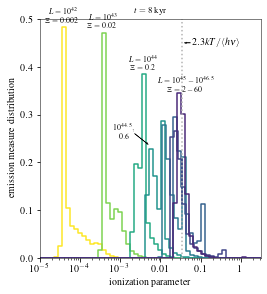

In [79]:
reload(plots)
plots.L_dependence_figs(qs,res_nH,
                      save=False,
                     norm_by_Lbol=False,iT0=iT)
pl.savefig(plots.figdir+'luminosity_weighted_U.pdf',bbox_inches='tight')

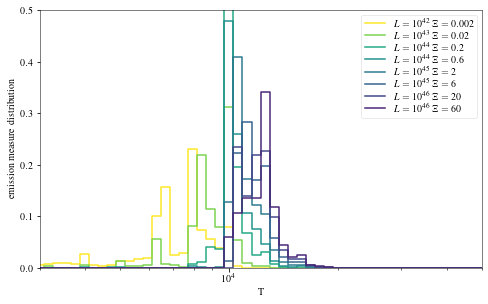

In [46]:
pl.figure()
iruns = np.argsort(np.array([run.LAGN for run in qs]))
for irun in iruns:
    run = qs[irun]
    c = plots.time_cmap((log(run.LAGN)-42)/5)
    norm = res_T[irun][0].sum()
    ys = res_T[irun][0] / norm
    label = r'$L=10^{%.0f}$'%log(run.LAGN)+r'  $\Xi=%s$'%plots.nSignificantDigits(run.LAGN/1e46*20,1,True)
    pl.step(10.**np.arange(0.0125,8-0.0125,0.025),ys,color=c,label=label)
pl.xlabel('T')
pl.ylabel(r'emission measure distribution')
pl.semilogx()
pl.xlim(3e3,0.5e5)
pl.gca().xaxis.set_major_formatter(plots.arilogformatter)
pl.ylim(0,0.5)
pl.legend()

In [41]:
reload(emission)

<module 'emission' from '/home/jonathan/rpc_hydro/./pysrc_new/emission.py'>

In [44]:
reload(proj)
qs = [proj.Run(names[i],nSnapshots[i],r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums))[:] 
      if os.path.exists(sim_data_names[i])]
qRP = qs[1] #10^45.5
qGP = qs[0] #10^43

In [82]:
sqs = [q for q in sorted(qs, key=lambda r: r.LAGN)] # if len(q)>10]
print([len(q) for q in sqs])
print(['%.1f'%log(q.LAGN) for q in sqs])

[401, 401, 401, 401, 401, 45, 28, 10]
['42.0', '43.0', '44.0', '44.5', '45.0', '45.5', '46.0', '46.5']


In [90]:
lines = ['Hb','Hb','OIIa','OIIb','OIIIa','OIIIb','NeIIIa','NeIIIb','NeVa','NeVb']
wls = emission.wls.take([2,3,6,7,12,13,14,15,16,17])
L_lines = [None]*len(sqs)
L_Hb = [None]*len(sqs)
for iq,q in enumerate(sqs):
    snapshot = q[8]
    L_lines[iq] = np.array([getattr(snapshot,'L'+line).cgs()[:,0].sum() for line in lines])
    L_lines[iq][1] = 0.469 * L_lines[iq][1] #fix for Hgamma       
    L_Hb[iq] = snapshot.LHb.cgs()[:,0].sum()

In [102]:
L_lines = np.array(L_lines)
L_Hb = np.array(L_Hb)
Lums = [q.LAGN for q in sqs]
cs = 'ggrrbbmmkk'

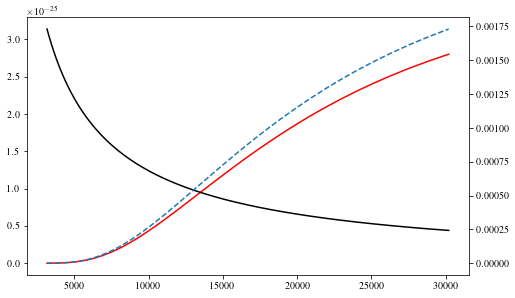

In [132]:
Ts = 10.**np.arange(3.5,4.5,0.02)
pl.plot(Ts,emission.LNeIIIa(Ts/1e4,1.,1.)*1e-4,c='r')
# pl.plot(Ts,emission.LOIIIa(Ts/1e4,1.,1.)*1e-4,c='b')
pl.plot(Ts,emission.L_Hb(Ts/1e4,1.,1.),c='k')
pl.twinx()
pl.plot(Ts,Ts**-0.5*np.e**(-emission.E_NeIIIa/(Ts*cons.k_B.to('erg/K').value)),ls='--')

[]

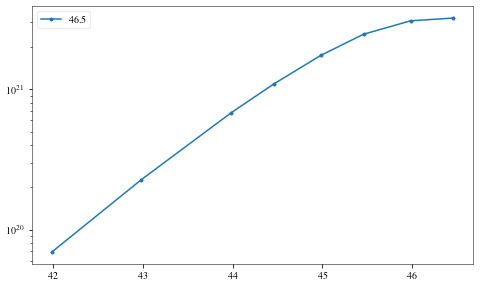

In [88]:
pl.plot([log(q.LAGN) for q in sqs],
    [(q[8].NH.cgs()-q[8].NHI.cgs())[ind,0] for i,q in enumerate(sqs)],
        '.-',
        label='%.1f'%log(q.LAGN))
pl.legend()
pl.semilogy()

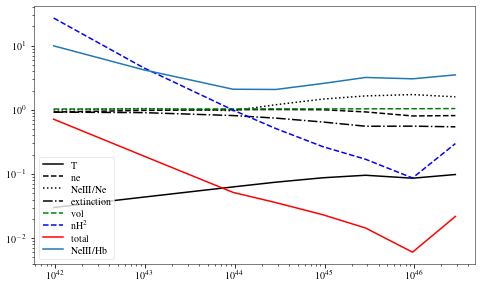

In [84]:
Ne_cons = 0.25 * 8.629e-8 * 0.754/5 * emission.E_NeIIIa
weighted_avg_f = np.zeros(len(sqs))
weighted_avg_ne = np.zeros(len(sqs))
weighted_avg_nH2 = np.zeros(len(sqs))
weighted_avg_L = np.zeros(len(sqs))
weighted_avg_T = np.zeros(len(sqs))
weighted_avg_ext = np.zeros(len(sqs))
weighted_avg_V = np.zeros(len(sqs))
for i,q in enumerate(sqs):
    snapshot = q[8]
    weights = snapshot.LHb.cgs()[:,0]
    fNeIII = snapshot.nNeIII2nH.cgs()[:,0] / 1e-4
    fne = snapshot.ne2nH.cgs()[:,0]
    ext = emission.extinction(snapshot.NH.cgs()[:,0],emission.E_NeIIIa)
    T4 = snapshot.T.cgs()[:,0]/1e4
    TNeIII = T4**(-0.5-0.011+0.004*np.log(T4))*np.e**(-emission.E_NeIIIa/(T4*1e4*cons.k_B.to('erg/K').value))
    V = snapshot.V.cgs()[:,0]/2.2e48
    nH2 = snapshot.nH.cgs()[:,0]**2 / snapshot.LHb.cgs()[:,0] *1e21
    weighted_avg_f[i]  = (fNeIII * weights).sum() / weights.sum()
    weighted_avg_ne[i] = (fne    * weights).sum() / weights.sum()
    weighted_avg_T[i]  = (TNeIII * weights).sum() / weights.sum()
    weighted_avg_ext[i]= (ext    * weights).sum() / weights.sum()
    weighted_avg_V[i]  = (V      * weights).sum() / weights.sum()
    weighted_avg_nH2[i]= (nH2    * weights).sum() / weights.sum()
    LNeIII = snapshot.LNeIIIa.cgs()[:,0] / snapshot.LHb.cgs()[:,0]
#     LNeIII = emission.LNeIIIa(T4,fNeIII*1e4*nH,fne*nH)*ext*V / snapshot.LHb.cgs()[:,0]
    weighted_avg_L[i]  = (LNeIII * weights).sum() / weights.sum()
pl.plot([q.LAGN for q in sqs],weighted_avg_T,   c='k',ls='-',label='T')
pl.plot([q.LAGN for q in sqs],weighted_avg_ne,  c='k',ls='--',label='ne')
pl.plot([q.LAGN for q in sqs],weighted_avg_f,   c='k',ls=':',label='NeIII/Ne')
pl.plot([q.LAGN for q in sqs],weighted_avg_ext, c='k',ls='-.',label='extinction')
pl.plot([q.LAGN for q in sqs],weighted_avg_V,   c='g',ls='--',label='vol')
pl.plot([q.LAGN for q in sqs],weighted_avg_nH2, c='b',ls='--',label=r'nH$^2$')
pl.plot([q.LAGN for q in sqs],weighted_avg_nH2*weighted_avg_V*weighted_avg_T*weighted_avg_f*weighted_avg_ne*weighted_avg_ext,c='r',ls='-',label='total')
pl.plot([q.LAGN for q in sqs],weighted_avg_L,label='NeIII/Hb')
pl.loglog()
# pl.ylim(0.01,3)
pl.legend()

In [209]:
emission.alpha_Hb(0.7), emission.alpha_Hb(2)

(4.1079245841823875e-14, 1.6078304262836875e-14)

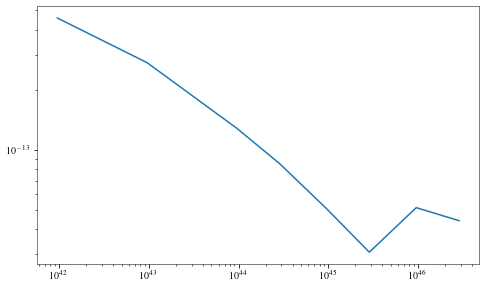

In [208]:
pl.loglog([q.LAGN for q in sqs],[q[8].LHb.cgs()[:,0].sum()/q.LAGN for q in sqs])

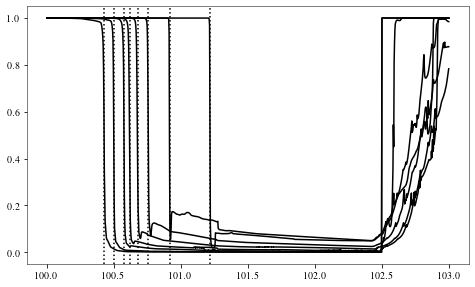

In [249]:
for q in sqs:
    pl.plot(q[8].r.cgs(),q[8].fHII.cgs()[:,0],c='k')
    pl.axvline(q[8].r.cgs()[(q[8].fHII.cgs()[:,0]<0.5).nonzero()[0][0]],c='k',ls=':')

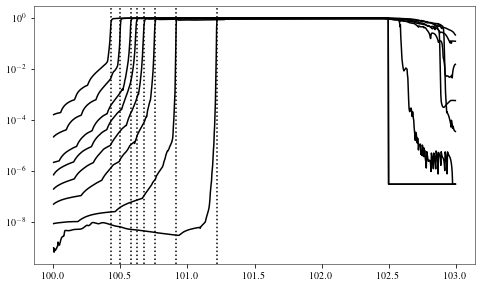

In [251]:
for q in sqs:
    pl.semilogy(q[8].r.cgs(),q[8].fHI.cgs()[:,0],c='k')
    pl.axvline(q[8].r.cgs()[(q[8].fHII.cgs()[:,0]<0.5).nonzero()[0][0]],c='k',ls=':')

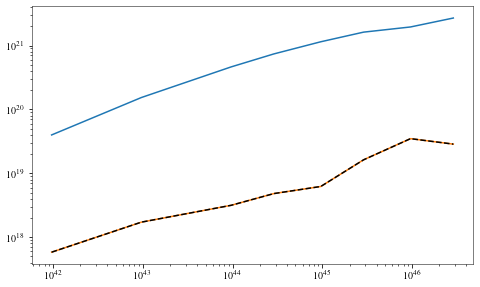

In [252]:
pl.loglog([q.LAGN for q in sqs],
        [q[8].NH.cgs()[(q[8].fHII.cgs()[:,0]<0.9).nonzero()[0][0],0] for q in sqs])
pl.loglog([q.LAGN for q in sqs],
        [q[8].NHI.cgs()[
            (q[8].fHII.cgs()[:,0]<0.9).nonzero()[0][0],0] for q in sqs])
pl.loglog([q.LAGN for q in sqs],
        [(q[8].nHI.cgs()*q[8].r.tiled_cgs(q[8].rho,tile_d=True) * un.pc.to('cm')).cumsum(axis=0)[
            (q[8].fHII.cgs()[:,0]<0.9).nonzero()[0][0]-1,0] for q in sqs],
         c='k',ls='--')

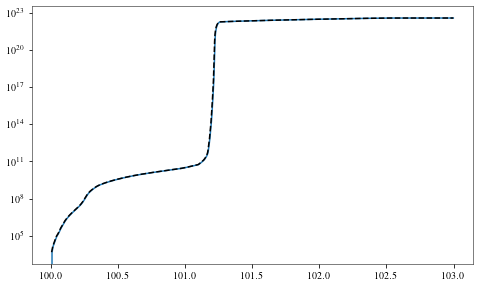

In [238]:
pl.semilogy(q[8].r.cgs(),q[8].NHI.cgs()[:,0])
pl.semilogy(q[8].r.cgs(),
          (q[8].nHI.cgs()*q[8].r.tiled_cgs(q[8].rho,tile_d=True) * un.pc.to('cm'))[:,0].cumsum(),
         c='k',ls='--')

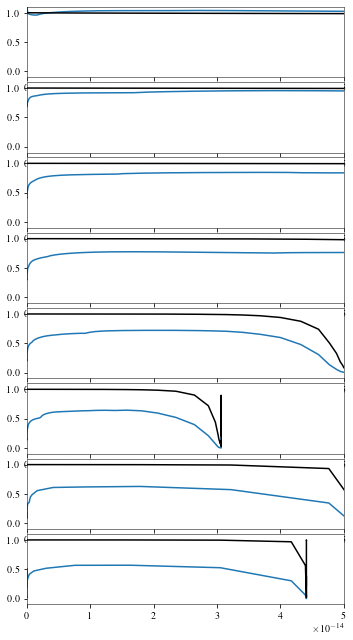

In [206]:
pl.figure(figsize=(5,10))
for i,q in enumerate(sqs[:8]):
    ax = pl.subplot(8,1,i+1)
    snapshot = q[8]
    pl.plot(snapshot.LHb.cgs()[:,0].cumsum()/q.LAGN,
            snapshot.LHb.cgs()[:,0]/3.03e-14/snapshot.V.cgs()[:,0]/emission.E_Hb / 
            (snapshot.nH.cgs()[:,0]**2*emission.extinction(snapshot.NH.cgs()[:,0],emission.E_Hb)))
    pl.plot(snapshot.LHb.cgs()[:,0].cumsum()/q.LAGN,
            (snapshot.nHII.cgs()/snapshot.nH.cgs())[:,0],c='k')
    pl.ylim(-0.1,1.1)
    pl.xlim(0,5e-14)
    

(0.2, 60)

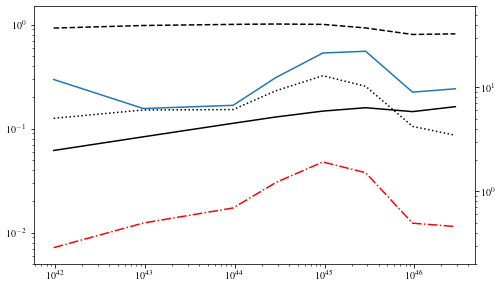

In [156]:
weighted_avg_f = np.zeros(len(sqs))
weighted_avg_ne = np.zeros(len(sqs))
weighted_avg_L = np.zeros(len(sqs))
weighted_avg_T = np.zeros(len(sqs))
for i,q in enumerate(sqs):
    snapshot = q[8]
    weights = snapshot.LHb.cgs()[:,0]
    fOIII = snapshot.nOIII2nH.cgs()[:,0] / 5e-4
    fne = snapshot.ne2nH.cgs()[:,0]
    LOIII = snapshot.LOIIIa.cgs()[:,0] / snapshot.LHb.cgs()[:,0]
    T4 = snapshot.T.cgs()[:,0]/1e4
    TOIII  = T4**(-0.5+0.120+0.031*np.log(T4))*np.e**(-emission.E_OIIIa /(1e4*T4*cons.k_B.to('erg/K').value))
#     weights = snapshot.nHII.cgs()[:,0]**2 * emission.extinction(snapshot.NH.cgs()[:,0],emission.E_Hb)
    weighted_avg_f[i]  = (fOIII * weights).sum() / weights.sum()
    weighted_avg_ne[i] = (fne * weights).sum()   / weights.sum()
    weighted_avg_L[i]  = (LOIII * weights).sum() / weights.sum()
    weighted_avg_T[i]  = (TOIII * weights).sum() / weights.sum()
pl.plot([q.LAGN for q in sqs],weighted_avg_T, c='k',ls='-')
pl.plot([q.LAGN for q in sqs],weighted_avg_ne,c='k',ls='--')
pl.plot([q.LAGN for q in sqs],weighted_avg_f, c='k',ls=':')
pl.plot([q.LAGN for q in sqs],weighted_avg_T*weighted_avg_f*weighted_avg_ne,c='r',ls='-.')
pl.loglog()
pl.ylim(0.005,1.5)
pl.twinx()
pl.plot([q.LAGN for q in sqs],weighted_avg_L)
pl.loglog()
pl.ylim(0.2,60)

<ipython-input-96-22bdd05e43af>:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  _ = pl.hist(log(snapshot.nNeIII2nH.cgs()[:,0]),bins = np.arange(-5,-3,.1),


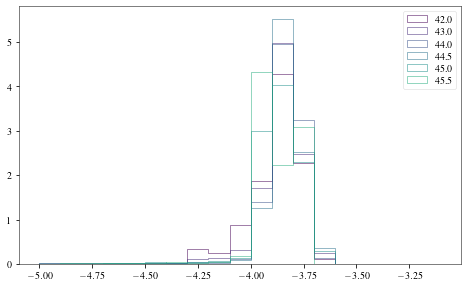

In [96]:
for i,q in enumerate(sqs[:-2]):
    snapshot = q[8]
    xs = snapshot.nH.cgs()**2*emission.extinction(snapshot.NH.cgs(),emission.E_NeIIIa)*snapshot.r.tiled_cgs(snapshot.rho,tile_d=True)
    _ = pl.hist(log(snapshot.nNeIII2nH.cgs()[:,0]),bins = np.arange(-5,-3,.1),
                weights=xs[:,0],histtype='step',
                label='%.1f'%(log(q.LAGN)),normed=True,color=pl.get_cmap('viridis')(i/8))
pl.legend()

[]

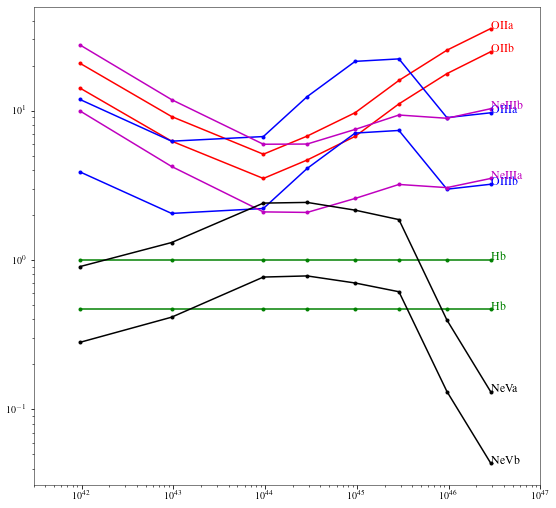

In [103]:
fig = pl.figure(figsize=(8,8))
for i,line in enumerate(lines):
#     if i%2==1: continue
    ratios = np.array(L_lines)[:,i]/L_Hb
    pl.plot(Lums[:], ratios[:],'.-',c=cs[i])    
    pl.text(Lums[-1],ratios[-1],line,fontsize=12,c=cs[i])
pl.xlim(3e41,1e47)
pl.loglog()

In [97]:
L_lines[i]

array([4.37591351e+29, 2.05230344e+29, 9.07991638e+30, 6.19931224e+30,
       5.19737863e+30, 1.70248110e+30, 4.35810948e+30, 1.20473359e+31,
       3.94891627e+29, 1.22902691e+29])

[]

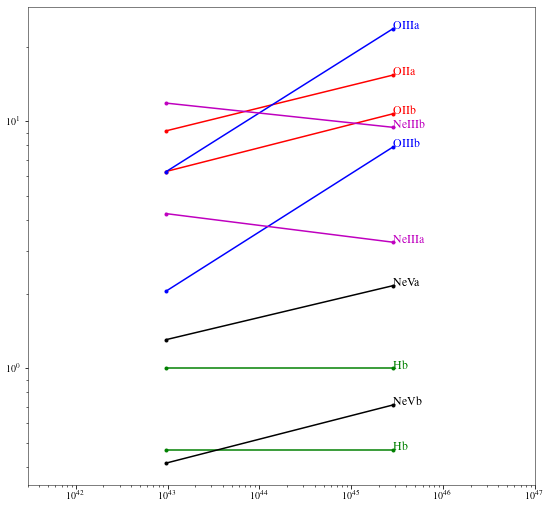

In [89]:
fig = pl.figure(figsize=(8,8))
for i,line in enumerate(lines):
#     if i%2==1: continue
    ratios = L_lines[:,i]/L_Hb
    pl.plot(Lums[:], ratios[:],'.-',c=cs[i])    
    pl.text(Lums[-1],ratios[-1],line,fontsize=12,c=cs[i])
pl.xlim(3e41,1e47)
pl.loglog()

In [ ]:
for i,q in enumerate(sqs):
    snapshot=q[10]
    ax=pl.subplot(1,7,i+1)
    pl.plot(snapshot.tau.cgs()[:,0],snapshot.nOIII2nH.cgs()[:,0]/5e-4)
    pl.plot(snapshot.tau.cgs()[:,0],snapshot.nOII2nH.cgs()[:,0]/5e-4)
    pl.plot(snapshot.tau.cgs()[:,0],snapshot.nOI2nH.cgs()[:,0]/5e-4)
    pl.semilogx()
#     ax=pl.subplot(2,7,i+8)
#     pl.plot(snapshot.tau.cgs()[:,0],snapshot.nH.cgs()[:,0])
#     pl.semilogx()
# pl.xlim(100.9,101.1)

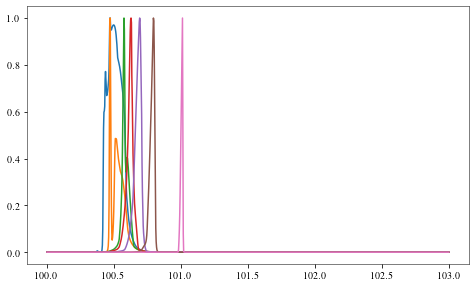

In [28]:
for i,q in enumerate(sqs):
    snapshot=q[10]
    pl.plot(snapshot.r.cgs(),snapshot.LNeIIIa.cgs()[:,0]/snapshot.LNeIIIa.cgs()[:,0].max())
#     pl.plot(snapshot.r.cgs(),snapshot.nNeIII2nH.cgs()[:,0]/5e-4)
# pl.xlim(100.9,101.1)

In [ ]:
ioni

(0, 30)

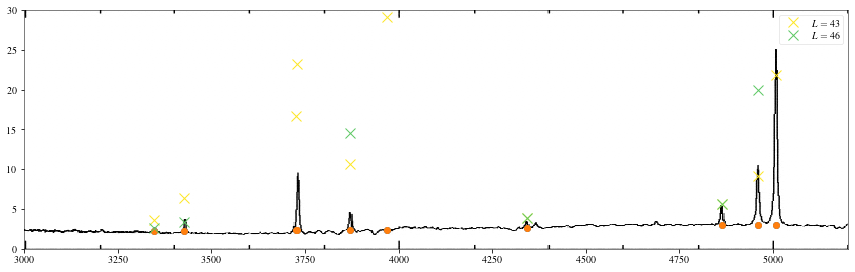

In [119]:
fig = pl.figure(figsize=(13,4))
ax = pl.subplot(111)
img = pl.imread(plots.figdir+'Type2_QSO_composite_Zakamska03.png')
ax.imshow(img, aspect='auto',extent=[2113,7138, 0, 30])
zero_points = np.array([3,2.65,3,3,2.35,2.35,2.35,2.35,2.3,2.3])
Hb_size = 2.6
for iq,q in enumerate(sqs):
    c = plots.time_cmap(iq/4)
    pl.plot(wls,zero_points,'o')
    pl.plot(wls,Hb_size * L_lines[iq]/L_Hb[iq] + zero_points,'x',ms=10,c=c,label=r'$L=%.0f$'%log(q.LAGN))
    pl.legend()
pl.xlim(3000,5200)
pl.ylim(0,30)
        


In [100]:
2.5/0.75*3

10.0

(100.9, 101.1)

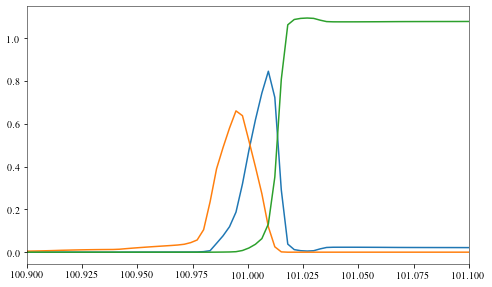

In [52]:
snapshot=sqs[1][10]
pl.plot(snapshot.r.cgs(),snapshot.nOII2nH.cgs()[:,0]/5e-4)
pl.plot(snapshot.r.cgs(),snapshot.nOIII2nH.cgs()[:,0]/5e-4)
pl.plot(snapshot.r.cgs(),snapshot.nOI2nH.cgs()[:,0]/5e-4)
pl.xlim(100.9,101.1)

(5e+32, 1e+34)

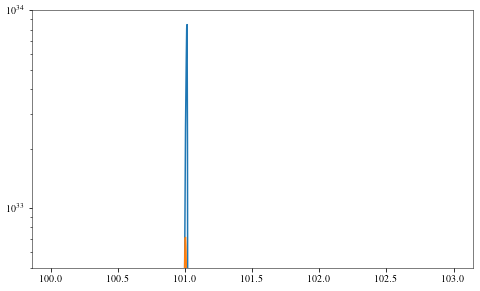

In [49]:
snapshot=sqs[1][10]
pl.plot(snapshot.r.cgs(),snapshot.LOIIa.cgs()[:,0])
pl.plot(snapshot.r.cgs(),snapshot.LOIIIa.cgs()[:,0])
pl.semilogy()
pl.ylim(0.5e33,1e34)

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


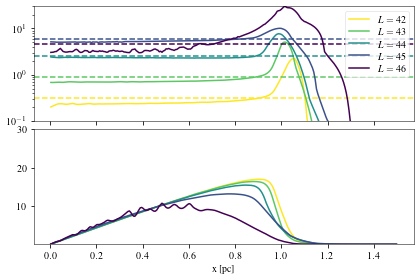

In [44]:

for iq,q in enumerate(sqs):
    c = plots.time_cmap(iq/4)
    snapshot = q[10]
    for iPanel in range(2):
        ax = pl.subplot(2,1,iPanel+1)
        if iPanel==0:
            pl.plot(snapshot.x.cgs(),snapshot.LOIII.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0),c=c,label=r'$L=%.0f$'%log(q.LAGN))
            pl.legend()
            pl.axhline(snapshot.LOIII.cgs().sum()/snapshot.LHb.cgs().sum(),c=c,ls='--')
            pl.semilogy()
        if iPanel==1:
            pl.plot(snapshot.x.cgs(),snapshot.LHb.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0)[80] * 10,c=c)            
        pl.xlabel(r'x [pc]')        
        pl.ylim(0.1,30)
        

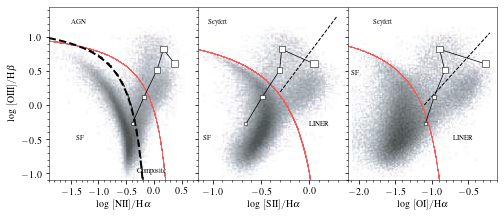

In [19]:
reload(plots)
plots.BPTplot_byL(qs)
pl.savefig(plots.figdir+'BPT.png',bbox_inches='tight',dpi=600)

In [18]:
snapshot = qGP[10]

In [34]:
snapshot.LHa.cgs().sum() / snapshot.Omega.cgs()[0,:].sum()

1.0772449346586087e+40

In [36]:
import emission

In [39]:
emission.wls

array([ 912., 6563., 4861., 5007., 6584., 6731., 6716., 6300.])

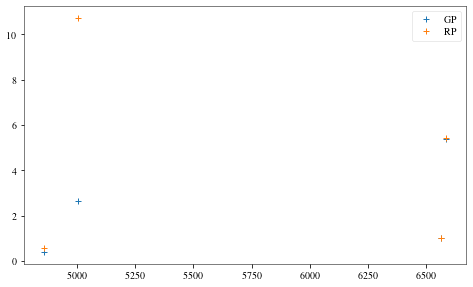

In [49]:
for i,sim in enumerate((qGP,qRP)):
    snapshot = sim[10]
    Ls = [getattr(snapshot,'L'+line).cgs()[:,0].sum() for line in ('Ha','Hb','OIII','NII')]
    wls = emission.wls[1:-3]
    pl.plot(wls,Ls/Ls[0],'+',label=('GP','RP')[i])
pl.legend()